In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
% pylab inline

Populating the interactive namespace from numpy and matplotlib


* Download tables from HEASARC by using [browse_extract_wget.pl](https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl) version 2a

In [2]:
### Uncomment below for downloading: 
! wget -q -nc https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl \
    -O browse_extract_wget.pl

! perl ./browse_extract_wget.pl \
table=suzamaster \
position='0.,0.' \
radius=100000 \
coordinates=Galactic \
fields=All \
format=Text \
resultmax=100000 \
outfile=suzaku-obs-raw.csv

In [3]:
# Final observation file size about 5 Mbytes (3k+ rows)
! wc suzaku-obs-raw.csv

   3060  443557 4911045 suzaku-obs-raw.csv


In [4]:
# It is written in txt format with '|' separator
! head -6 suzaku-obs-raw.csv



Results from suzamaster
Coordinate system:galactic
|name                    |_l       |_b       |lii      |bii      |roll_angle|time               |stop_time          |obsid    |exposure    |time_awarded|xis0_expo   |xis1_expo   |xis2_expo   |xis3_expo   |xis0_num_modes|xis1_num_modes|xis2_num_modes|xis3_num_modes|hxd_num_modes|hxd_expo_co|hxd_expo_fi|hxd_expo_no |hxd_expo    |hxd_expo_wam|hxd_bursts|processing_status|processing_date    |public_date        |distribution_date  |processing_version|num_processed|software_version                        |prnb  |abstract                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [5]:
# converting to pandas dataset
data = pd.read_csv('suzaku-obs-raw.csv', sep='|', header=0, skiprows=4)
data.head()

,Unnamed: 0,name,_l,_b,lii,bii,roll_angle,time,stop_time,obsid,...,copi_lname,copi_fname,country,cycle,obs_type,title,aimpoint,injection,_offset,Unnamed: 50
0,NaN,SAGITTARIUS A*,359.94961,-0.04265,359.94961,-0.04265,285.0058,2013-09-12T06:14:01,2013-09-12T15:44:22,408017020,...,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,3.9608,NaN
1,NaN,SAGITTARIUS A*,359.94550,-0.04321,359.94550,-0.04321,106.9995,2014-03-07T01:21:24,2014-03-07T13:10:11,408017050,...,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.1729,NaN
2,NaN,SAGITTARIUS A*,359.94564,-0.04343,359.94564,-0.04343,106.9998,2014-03-22T11:20:17,2014-03-22T23:45:16,408017070,...,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.1748,NaN
3,NaN,SAGITTARIUS A*,359.94496,-0.04385,359.94496,-0.04385,107.0004,2014-03-28T21:37:05,2014-03-29T14:58:21,408017080,...,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.2225,NaN
4,NaN,SAGITTARIUS A*,359.94469,-0.04360,359.94469,-0.04360,105.8159,2015-04-01T00:30:59,2015-04-01T16:23:11,409011050,...,null,null,JAP,9,AO9,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.2259,NaN


In [6]:
data.columns

Index(['Unnamed: 0', 'name                    ', '_l       ', '_b       ',
       'lii      ', 'bii      ', 'roll_angle', 'time               ',
       'stop_time          ', 'obsid    ', 'exposure    ', 'time_awarded',
       'xis0_expo   ', 'xis1_expo   ', 'xis2_expo   ', 'xis3_expo   ',
       'xis0_num_modes', 'xis1_num_modes', 'xis2_num_modes', 'xis3_num_modes',
       'hxd_num_modes', 'hxd_expo_co', 'hxd_expo_fi', 'hxd_expo_no ',
       'hxd_expo    ', 'hxd_expo_wam', 'hxd_bursts', 'processing_status',
       'processing_date    ', 'public_date        ', 'distribution_date  ',
       'processing_version', 'num_processed',
       'software_version                        ', 'prnb  ',
       'abstract                                                                                                                                                                                                                                                                                               

In [7]:
# Brief descrption of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 51 columns):
Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          0 non-null float64
name                                                                  

In [8]:
# shorted column names for simplicity
r = []
for col in data.columns:
    r.append(col.replace(' ', ''))
data.columns = r

In [9]:
data.columns

Index(['Unnamed:0', 'name', '_l', '_b', 'lii', 'bii', 'roll_angle', 'time',
       'stop_time', 'obsid', 'exposure', 'time_awarded', 'xis0_expo',
       'xis1_expo', 'xis2_expo', 'xis3_expo', 'xis0_num_modes',
       'xis1_num_modes', 'xis2_num_modes', 'xis3_num_modes', 'hxd_num_modes',
       'hxd_expo_co', 'hxd_expo_fi', 'hxd_expo_no', 'hxd_expo', 'hxd_expo_wam',
       'hxd_bursts', 'processing_status', 'processing_date', 'public_date',
       'distribution_date', 'processing_version', 'num_processed',
       'software_version', 'prnb', 'abstract', 'subject_category',
       'category_code', 'priority', 'pi_lname', 'pi_fname', 'copi_lname',
       'copi_fname', 'country', 'cycle', 'obs_type', 'title', 'aimpoint',
       'injection', '_offset', 'Unnamed:50'],
      dtype='object')

In [10]:
# Note that are several proposal categories already included to HEASARC data
data['subject_category'].head(30)                                                             

0     GALACTIC POINT SOURCES       
1     GALACTIC POINT SOURCES       
2     GALACTIC POINT SOURCES       
3     GALACTIC POINT SOURCES       
4     GALACTIC POINT SOURCES       
5     GALACTIC POINT SOURCES       
6     GALACTIC POINT SOURCES       
7     GALACTIC POINT SOURCES       
8     GALACTIC POINT SOURCES       
9     GALACTIC POINT SOURCES       
10    GALACTIC POINT SOURCES       
11    GALACTIC POINT SOURCES       
12    GALACTIC POINT SOURCES       
13    GALACTIC POINT SOURCES       
14    CALIBRATION                  
15    GALACTIC DIFFUSE EMISSION    
16    CALIBRATION                  
17    CALIBRATION                  
18    CALIBRATION                  
19    GALACTIC POINT SOURCES       
20    GALACTIC DIFFUSE EMISSION    
21    CALIBRATION                  
22    GALACTIC DIFFUSE EMISSION    
23    CALIBRATION                  
24    GALACTIC COMPACT OBJECT      
25    CALIBRATION                  
26    CALIBRATION                  
27    GALACTIC DIFFUSE EMISS

In [11]:
# First and last columns do not contain any relevant information and are removed:
data.drop([data.columns[0], data.columns[-1]], axis=1, inplace=True)
data.head()

,name,_l,_b,lii,bii,roll_angle,time,stop_time,obsid,exposure,...,pi_fname,copi_lname,copi_fname,country,cycle,obs_type,title,aimpoint,injection,_offset
0,SAGITTARIUS A*,359.94961,-0.04265,359.94961,-0.04265,285.0058,2013-09-12T06:14:01,2013-09-12T15:44:22,408017020,19276.0,...,YOSHITOMO,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,3.9608
1,SAGITTARIUS A*,359.94550,-0.04321,359.94550,-0.04321,106.9995,2014-03-07T01:21:24,2014-03-07T13:10:11,408017050,21994.9,...,YOSHITOMO,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.1729
2,SAGITTARIUS A*,359.94564,-0.04343,359.94564,-0.04343,106.9998,2014-03-22T11:20:17,2014-03-22T23:45:16,408017070,21588.7,...,YOSHITOMO,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.1748
3,SAGITTARIUS A*,359.94496,-0.04385,359.94496,-0.04385,107.0004,2014-03-28T21:37:05,2014-03-29T14:58:21,408017080,20481.8,...,YOSHITOMO,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.2225
4,SAGITTARIUS A*,359.94469,-0.04360,359.94469,-0.04360,105.8159,2015-04-01T00:30:59,2015-04-01T16:23:11,409011050,28670.6,...,YOSHITOMO,null,null,JAP,9,AO9,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.2259


In [12]:
data['processing_status'].unique()

array(['PROCESSED        '], dtype=object)

In [13]:
data['subject_category'] = data['subject_category'].apply(lambda x: str(x).rstrip())
categories = data['subject_category'].unique().tolist()
data['category_num'] = data['subject_category'].apply(lambda x: categories.index(x))
data['category_num'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [14]:
print(categories)

['GALACTIC POINT SOURCES', 'CALIBRATION', 'GALACTIC DIFFUSE EMISSION', 'GALACTIC COMPACT OBJECT', 'EXTRAGALACTIC DIFFUSE SOURCES', 'EXTRAGALACTIC COMPACT SOURCES', 'EXTRAGALACTIC POINT SOURCES']


In [15]:
# Some observations have non-zero xis2 exposure
len(data['xis2_expo'].unique())

439

In [16]:
data.head()

,name,_l,_b,lii,bii,roll_angle,time,stop_time,obsid,exposure,...,copi_lname,copi_fname,country,cycle,obs_type,title,aimpoint,injection,_offset,category_num
0,SAGITTARIUS A*,359.94961,-0.04265,359.94961,-0.04265,285.0058,2013-09-12T06:14:01,2013-09-12T15:44:22,408017020,19276.0,...,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,3.9608,0
1,SAGITTARIUS A*,359.94550,-0.04321,359.94550,-0.04321,106.9995,2014-03-07T01:21:24,2014-03-07T13:10:11,408017050,21994.9,...,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.1729,0
2,SAGITTARIUS A*,359.94564,-0.04343,359.94564,-0.04343,106.9998,2014-03-22T11:20:17,2014-03-22T23:45:16,408017070,21588.7,...,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.1748,0
3,SAGITTARIUS A*,359.94496,-0.04385,359.94496,-0.04385,107.0004,2014-03-28T21:37:05,2014-03-29T14:58:21,408017080,20481.8,...,null,null,JAP,8,AO8,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.2225,0
4,SAGITTARIUS A*,359.94469,-0.04360,359.94469,-0.04360,105.8159,2015-04-01T00:30:59,2015-04-01T16:23:11,409011050,28670.6,...,null,null,JAP,9,AO9,SUZAKU MONITORING OF SGR A* GIGIANTIC FLARE ...,XIS,Y,4.2259,0


In [17]:
for col in ['exposure', '_offset', 'category_num', '_l', '_b', 'xis0_expo', 'xis1_expo', 'xis2_expo', 'xis3_expo']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [18]:
data.describe()

,_l,_b,lii,bii,roll_angle,obsid,exposure,time_awarded,xis0_expo,xis1_expo,...,hxd_expo_no,hxd_expo,hxd_expo_wam,hxd_bursts,num_processed,prnb,category_code,cycle,_offset,category_num
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3.055000e+03,3055.000000,3055.000000,3055.000000,3055.000000,...,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,185.496983,2.589456,185.496983,2.589456,184.761221,5.667662e+08,46361.289067,55682.945990,46152.966710,46543.755581,...,38269.712668,38269.712668,87090.767136,0.828805,2.399018,47316.053355,5.621604,4.566285,4963.140213,2.621931
std,111.370252,36.573317,111.370252,36.573317,97.875742,2.272159e+08,39789.747673,60028.275322,39791.853039,39835.797625,...,35785.760528,35785.760528,77524.201936,1.176815,0.808962,28283.235974,2.265641,2.792211,2751.909770,1.763184
min,0.004800,-88.035790,0.004800,-88.035790,1.542900,1.000010e+08,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,3.960800,0.000000
25%,79.023125,-14.380045,79.023125,-14.380045,89.028250,4.070460e+08,19050.300000,20000.000000,18885.200000,19168.450000,...,13572.800000,13572.800000,32443.950000,0.000000,2.000000,21305.500000,4.000000,2.000000,3160.254150,1.000000
50%,181.504940,-0.478440,181.504940,-0.478440,212.440100,5.080450e+08,37157.800000,40000.000000,36899.000000,37510.000000,...,29449.100000,29449.100000,68148.000000,0.000000,2.000000,50018.000000,5.000000,5.000000,4883.752900,2.000000
75%,287.450100,24.534690,287.450100,24.534690,274.687300,8.020835e+08,60397.450000,70000.000000,60227.750000,60772.550000,...,50800.300000,50800.300000,116709.950000,1.000000,3.000000,71211.500000,8.000000,7.000000,7016.393850,4.000000
max,359.999810,89.475300,359.999810,89.475300,359.844100,9.090020e+08,347568.100000,620000.000000,347568.100000,347576.100000,...,355072.400000,355072.400000,461263.800000,12.000000,13.000000,105001.000000,9.000000,10.000000,10765.032200,6.000000


In [19]:
filtered_data = data[['obsid', 'exposure', '_offset', '_l', '_b', 'category_num', 'xis0_expo', 'xis1_expo', 'xis2_expo', 'xis3_expo']]
filtered_data = filtered_data.dropna(axis=0, how='any')
filtered_data.head()

,obsid,exposure,_offset,_l,_b,category_num,xis0_expo,xis1_expo,xis2_expo,xis3_expo
0,408017020,19276.0,3.9608,359.94961,-0.04265,0,19282.3,19290.1,0.0,19276.0
1,408017050,21994.9,4.1729,359.94550,-0.04321,0,21994.9,22002.9,0.0,22014.4
2,408017070,21588.7,4.1748,359.94564,-0.04343,0,21618.5,21588.7,0.0,21644.2
3,408017080,20481.8,4.2225,359.94496,-0.04385,0,20491.7,20503.6,0.0,20481.8
4,409011050,28670.6,4.2259,359.94469,-0.04360,0,28670.6,28670.6,0.0,28686.6


In [20]:
# group exposure by off-center angle _offset by making $10^\circ$ bins
dr = 10
filtered_data['raw_offset'] = filtered_data['_offset'].apply(lambda x: math.floor(x/(60.0*dr))*dr)
filtered_data.head()

binned_time = filtered_data.groupby('raw_offset').agg(sum)[['xis0_expo', 'xis1_expo', 'xis2_expo', 'xis3_expo']]

In [21]:
binned_time

,xis0_expo,xis1_expo,xis2_expo,xis3_expo
raw_offset,,,,
0,12604003.4,12683359.1,1280283.5,12678865.2
10,7037081.4,7158259.9,1094085.4,7074923.5
20,4763568.6,4762072.4,823976.5,4842722.1
30,6734307.1,6819885.2,924608.4,6755093.6
40,5200814.9,5252849.5,960654.3,5246866.7
50,8313909.3,8328221.3,1224492.3,8324400.7
60,9345263.1,9456467.7,1498239.5,9383333.7
70,13989329.6,14118024.6,1436941.7,14230361.2
80,13654381.6,13641382.2,1616225.4,13657575.7


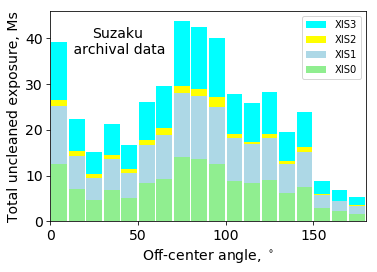

In [22]:
plt.xlim([0., 180.])
plt.bar(np.array(binned_time.index + 5), 
        1e-6*np.array(binned_time['xis0_expo'] + binned_time['xis1_expo'] + binned_time['xis2_expo'] + binned_time['xis3_expo']), 
        width=9.0, color='cyan')
plt.bar(np.array(binned_time.index + 5), 
        1e-6*np.array(binned_time['xis0_expo'] + binned_time['xis1_expo'] + binned_time['xis2_expo']), 
        width=9.0, color='yellow')
plt.bar(np.array(binned_time.index + 5), 
        1e-6*np.array(binned_time['xis0_expo'] + binned_time['xis1_expo']), 
        width=9.0, color='lightblue')
plt.bar(np.array(binned_time.index + 5), 
        1e-6*np.array(binned_time['xis0_expo']), 
        width=9.0, color='lightgreen')

plt.legend(['XIS3', 'XIS2', 'XIS1', 'XIS0'])
plt.xlabel('Off-center angle, ${}^\circ$', size=14)
plt.ylabel('Total uncleaned exposure, Ms', size=14)
plt.tick_params(axis ='both', which='major', length=4, labelsize =14, color='black')
plt.tick_params(axis ='both', which='minor', length=0)
plt.figtext(x=0.305, y=0.73, s='Suzaku\n archival data', ha='center', size=14, color='black')
plt.subplots_adjust(left=0.15, right=0.88, top=0.88, bottom=0.15)

plt.savefig("suzaku-uncleaned-exposure.pdf", 
            format="pdf", transparent=True,rasterized=True,dpi=300, pad_inches=1)

Selecting only requested columns (pointing ID, exposures, coords, category -- cluster, galaxy etc)

In [23]:
filtered_data.head()

,obsid,exposure,_offset,_l,_b,category_num,xis0_expo,xis1_expo,xis2_expo,xis3_expo,raw_offset
0,408017020,19276.0,3.9608,359.94961,-0.04265,0,19282.3,19290.1,0.0,19276.0,0
1,408017050,21994.9,4.1729,359.94550,-0.04321,0,21994.9,22002.9,0.0,22014.4,0
2,408017070,21588.7,4.1748,359.94564,-0.04343,0,21618.5,21588.7,0.0,21644.2,0
3,408017080,20481.8,4.2225,359.94496,-0.04385,0,20491.7,20503.6,0.0,20481.8,0
4,409011050,28670.6,4.2259,359.94469,-0.04360,0,28670.6,28670.6,0.0,28686.6,0


In [24]:
filtered_data.groupby('category_num').agg(sum)[['xis0_expo', 'xis1_expo', 'xis2_expo', 'xis3_expo']]*1e-6

,xis0_expo,xis1_expo,xis2_expo,xis3_expo
category_num,,,,
0,22.289200,22.497261,2.173427,22.691077
1,9.646920,9.892651,3.768714,9.918488
2,36.351033,36.521096,4.296944,36.523326
3,0.631950,0.629985,0.092030,0.688096
4,36.566792,37.010896,3.305269,36.781219
5,35.449544,35.577138,4.083392,35.592255
6,0.061874,0.062146,0.000000,0.062146


In [25]:
filtered_data.to_csv('filtered_data_suzaku.csv')
! wc filtered_data_suzaku.csv

  3056   3056 273150 filtered_data_suzaku.csv
